# Pandas

[Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

In [1]:
import pandas as pd

df = pd.DataFrame({
    "a" : [4 ,4, 6, 5],
    "b" : [7.0, 8.0, 9.0, 15.0],
    "c" : [10.0, 11.0, 12.0, 20.0],
    "text": ['我', '今天', '沒', '吃飽']
})

df

,a,b,c,text
0,4,7,10,我
1,4,8,11,今天
2,6,9,12,沒
3,5,15,20,吃飽


## Basic Data Frame Manitpulation

### Sort Values

- `df.sort_values('a')`
- `df.sort_values('a',ascending=False)`

### Columns

- `df.drop(columns=['a','c'])`
- `df[list_of_COLNAMES]`: `df[['a','b','c']]`
    - returns df
- `df.select_dtypes(include=['float64'])`
- `df.select_dtypes(exclude=['float64'])`
- `df[COLNAME]`: `df['width']`
    - returns series

### Rows

- `df.head()`, `df.tail()`
- `df.iloc[:3]`
- `df[df["a"] > 4]`, `df[~(df["a"] > 4)]`  `df[df['a'].isin({5, 6})]`
- `df.drop_duplicates()`
- `df.sample(frac=0.5)`, df.sample(n=100)


### Rows + Columns

- `df.iloc[:3, [0, 2]]`
- `df.iloc[:3][['a', 'b']]`


### Cell Value

df.at[num, colname]:

- `df.at[0, 'c']`
- assign: `df.at[0, 'new_text'] = '今天星期一'`

## Text Processing

In [2]:
df[df["text"].str.match('..')]

,a,b,c,text
1,4,8,11,今天
3,5,15,20,吃飽


In [3]:
df[df["text"].isin({'我', '沒'})]

,a,b,c,text
0,4,7,10,我
2,6,9,12,沒


In [4]:
df.at[0, 'new_text'] = '今天星期一'
df

,a,b,c,text,new_text
0,4,7,10,我,今天星期一
1,4,8,11,今天,NaN
2,6,9,12,沒,NaN
3,5,15,20,吃飽,NaN


## Iteration

In [5]:
for i, row in df.iterrows():
    print(i)
    print(f"Cell 0: {row[0]}")
    print(f"Cell 1: {row[1]}")
    print(f"Cell 2: {row[2]}")
    print(f"Cell 3: {row[3]}")
    print()

0
Cell 0: 4
Cell 1: 7
Cell 2: 10
Cell 3: 我

1
Cell 0: 4
Cell 1: 8
Cell 2: 11
Cell 3: 今天

2
Cell 0: 6
Cell 1: 9
Cell 2: 12
Cell 3: 沒

3
Cell 0: 5
Cell 1: 15
Cell 2: 20
Cell 3: 吃飽



In [6]:
day = list('日一二三四五六')

for i, row in df.iterrows():
    df.at[i, 'new_text'] = f"今天星期{day[i]}"

df

,a,b,c,text,new_text
0,4,7,10,我,今天星期日
1,4,8,11,今天,今天星期一
2,6,9,12,沒,今天星期二
3,5,15,20,吃飽,今天星期三


In [7]:
for col in df:
    print(f"Colname: {col}")

Colname: a
Colname: b
Colname: c
Colname: text
Colname: new_text


## Plotting

### Setting up `matplotlib` display options in Jupyter notebook

In [8]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.family'] = ['AR PL KaitiM Big5']  # Custom font (installed on computer, .ttf format)
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']    # Custom font (installed on computer, .ttf format)
plt.rcParams.update({'font.size': 18})
plt.rcParams['axes.unicode_minus'] = False

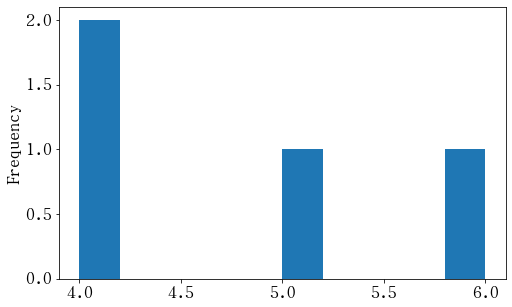

In [9]:
df['a'].plot.hist()

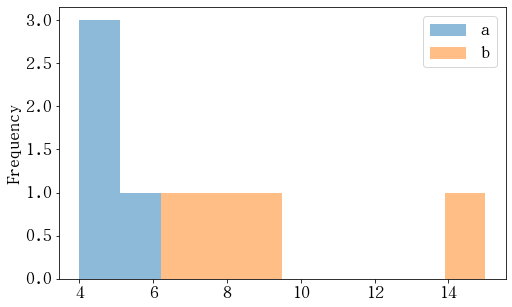

In [10]:
df[['a', 'b']].plot.hist(alpha=0.5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f50d87ff650>,
      dtype=object)

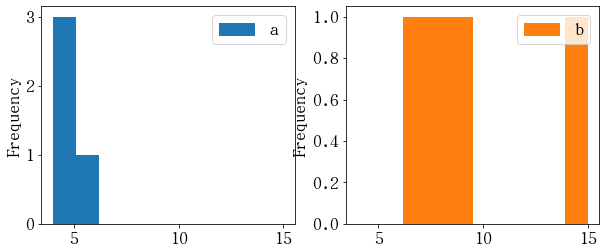

In [11]:
df[['a', 'b']].plot.hist(subplots=True, layout=(1,2), figsize=(10, 4))

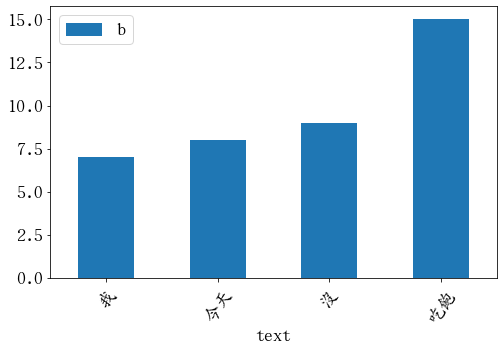

In [12]:
df.plot.bar(x='text', y='b', rot=55) 

## Miscellaneous

In [14]:
df.corr()

,a,b,c
a,1.000000,0.363270,0.323531
b,0.363270,1.000000,0.998765
c,0.323531,0.998765,1.000000


In [15]:
df.select_dtypes(exclude=['float64'])

,a,b,c,text,new_text
0,4,7,10,我,今天星期日
1,4,8,11,今天,今天星期一
2,6,9,12,沒,今天星期二
3,5,15,20,吃飽,今天星期三


In [ ]:
df.select_dtypes(include=['float64']).to_numpy()